In [1]:
import numpy as np
import sklearn as sk
from tensorflow import keras
import pandas as pd
import scipy
import tensorflow as tf

import pandas as pd
from sklearn import preprocessing


In [15]:
#load data
'''
x_data_uf = pd.read_csv('x_train.csv', sep = ',')
y_data = pd.read_csv('y_train.csv', sep = ',')
x_data_uf = x_data_uf.iloc[:,1:]
y_data = y_data.iloc[:,1:]
'''
data_un = pd.read_csv('train_data.csv', sep = ',')

#need to check exactly how these are loaded.
x_data_uf = data_un.iloc[:,2:36]
y_data = data_un.claim_amount

In [16]:
cat_to_int_dict = {'pol_coverage': {'Mini':0, 'Median1':1, 'Median2':2, 'Maxi':3},
                           'pol_pay_freq': {'Monthly':0, 'Quarterly':1, 'Biannual':2, 'Yearly':3},
                           'pol_payd': {'No':0, 'Yes':1},
                           'pol_usage': {'Retired':0, 'WorkPrivate':1, 'Professional':2, 'AllTrips':3},
                           'drv_drv2': {'No':0, 'Yes':1},
                           'drv_sex1': {'F':0, 'M':1},
                           'drv_sex2': {'F':-1, 'M':1, None:0},
                           'vh_type': {'Tourism':0, 'Commercial':1,}
                           }

def car_make_categories(car_make):
    if car_make in ['RENAULT','RENAULT','PEUGEOT','CITROEN','VOLKSWAGEN','FORD']:
        return car_make
    else:
        return 'OTHER'
    
def missing_geo_data(x):
    if x:
        return 1
    else:
        return 0


def zero_vh_weight(weight, avg_weight):
    if weight<100:
        return avg_weight
    else:
        return weight

x_data_f = x_data_uf.replace(cat_to_int_dict, inplace=False)
x_data_f.vh_make = x_data_uf['vh_make'].apply(lambda x: car_make_categories(x))

avg_vh_weight = x_data_uf['vh_weight'].mean()
x_data_f.vh_weight = x_data_uf['vh_weight'].apply(lambda x: zero_vh_weight(x, avg_vh_weight))

vh_make_cols = pd.get_dummies(x_data_f.vh_make)
vh_fuel_cols= pd.get_dummies(x_data_f.vh_fuel)
city_dist_cols= pd.get_dummies(x_data_f.city_district_code)

geo_na_col = (x_data_f['population'].isnull()).apply(lambda x: missing_geo_data(x))

#need to change means so not dependent on training data
MEANS = x_data_uf.mean()
x_data_f = x_data_f.fillna(MEANS)


cols_to_drop = ['pol_insee_code', 'vh_model', 'regional_department_code', 'commune_code', 
                'canton_code', 'vh_make', 'city_district_code', 'vh_fuel']
x_data_f = x_data_f.drop(cols_to_drop, axis = 1)


#replace vh_make with indicators
x_data_f = pd.concat([x_data_f, vh_make_cols, vh_fuel_cols, city_dist_cols], axis=1, sort=False)


x_norm_temp = x_data_f.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x_norm_temp)
x_norm_temp = pd.DataFrame(x_scaled)

x_data = x_norm_temp

In [17]:
x_data_f.dtypes

pol_bonus             float64
pol_coverage            int64
pol_duration            int64
pol_sit_duration        int64
pol_pay_freq            int64
pol_payd                int64
pol_usage               int64
drv_drv2                int64
drv_age1                int64
drv_age2                int64
drv_sex1                int64
drv_sex2                int64
drv_age_lic1            int64
drv_age_lic2            int64
vh_age                  int64
vh_cyl                  int64
vh_din                  int64
vh_sale_begin           int64
vh_sale_end             int64
vh_speed                int64
vh_type                 int64
vh_value                int64
vh_weight             float64
town_mean_altitude    float64
town_surface_area     float64
population            float64
CITROEN                 uint8
FORD                    uint8
OTHER                   uint8
PEUGEOT                 uint8
RENAULT                 uint8
VOLKSWAGEN              uint8
Diesel                  uint8
Gasoline  

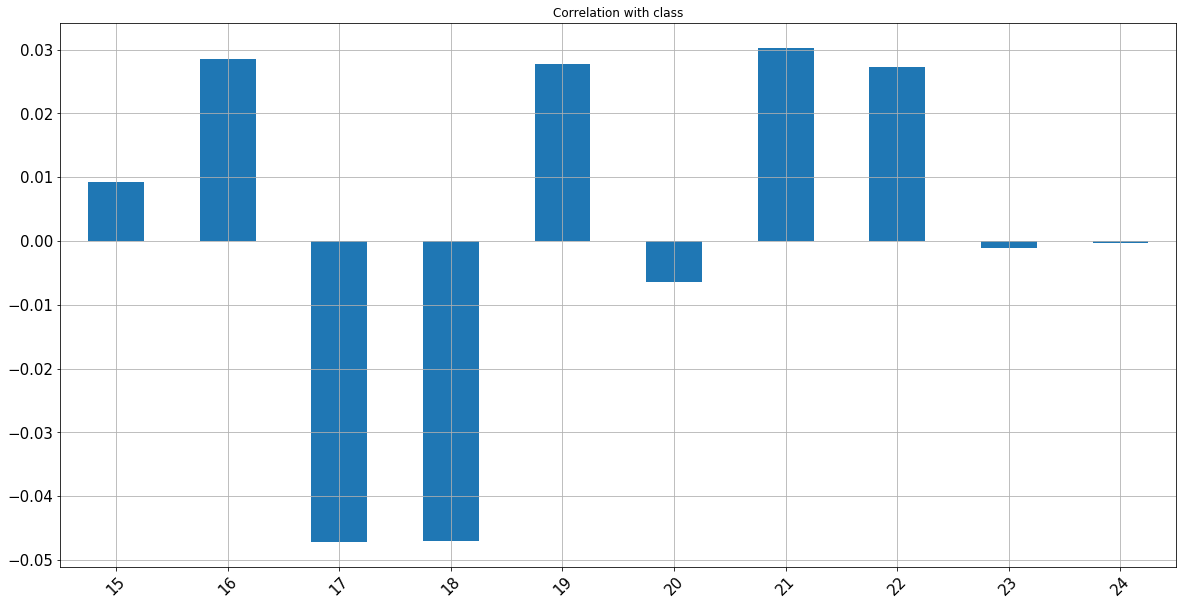

In [20]:
x_data.iloc[:,15:25].corrwith(y_data).plot.bar(
        figsize = (20, 10), title = "Correlation with class", fontsize = 15,
        rot = 45, grid = True)

In [ ]:
#NOW TO BUILD THE NEURAL NETWORK
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model